In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
fn=pd.read_csv("book.csv")
fn

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
fnn = apriori(fn, min_support=0.005, max_len=3,use_colnames = True)
fnn

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
219,0.0130,"(Florence, GeogBks, ItalCook)"
220,0.0115,"(ItalArt, GeogBks, ItalAtlas)"
221,0.0090,"(Florence, ItalArt, GeogBks)"
222,0.0125,"(ItalArt, ItalCook, ItalAtlas)"


In [4]:
fnn.sort_values('support',ascending=False,inplace=True)
fnn

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
12,0.2560,"(ChildBks, CookBks)"
...,...,...
206,0.0065,"(Florence, RefBks, ItalAtlas)"
64,0.0065,"(Florence, ItalAtlas)"
207,0.0055,"(Florence, ItalArt, RefBks)"
109,0.0055,"(Florence, ChildBks, ItalAtlas)"


In [5]:
rules=association_rules(fnn,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
4,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
...,...,...,...,...,...,...,...,...,...
1049,"(YouthBks, Florence)",(ItalArt),0.0255,0.0485,0.0055,0.215686,4.447140,0.004263,1.213163
1050,"(Florence, ItalArt)",(YouthBks),0.0125,0.2475,0.0055,0.440000,1.777778,0.002406,1.343750
1051,(YouthBks),"(Florence, ItalArt)",0.2475,0.0125,0.0055,0.022222,1.777778,0.002406,1.009943
1052,(ItalArt),"(YouthBks, Florence)",0.0485,0.0255,0.0055,0.113402,4.447140,0.004263,1.099145


<ipython-input-6-5963871f8379>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['support'][i] = rules['support'][i] + 0.0025 * (random.randint(1,10) - 5)
<ipython-input-6-5963871f8379>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['confidence'][i] = rules['confidence'][i] + 0.0025 * (random.randint(1,10) - 5)


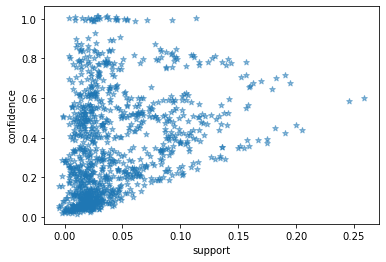

In [6]:
import random
import matplotlib.pyplot as plt


for i in range (len(rules['support'])):
    rules['support'][i] = rules['support'][i] + 0.0025 * (random.randint(1,10) - 5) 
    rules['confidence'][i] = rules['confidence'][i] + 0.0025 * (random.randint(1,10) - 5)

plt.scatter(rules['support'], rules['confidence'],   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()